In [1]:
import  os, sys
os.getcwd()

'C:\\Users\\Diksha'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date

In [3]:
dataset=pd.read_csv(r'D:\Diksha 2023\Learnbay source\Projects\1. Ecommerce Project\E-com_Data.csv')
dataset.head(5)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.shape

(541116, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [6]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [7]:
dataset['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [8]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [9]:
dataset.duplicated().sum()

3145

In [10]:
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [243]:
dataset.duplicated().sum()

0

In [244]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [245]:
dataset=dataset.drop(['Quantity',
       'Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

In [246]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Price
0,4355.0,15734,398177.0,29-10-2017,1926.0
1,4352.0,14616,394422.0,05-10-2017,1740.0
2,4352.0,14614,394422.0,12-10-2017,1866.0
3,4352.0,85014B,388633.0,22-08-2017,1869.0
4,4352.0,15364,394422.0,10-10-2017,1888.0


In [247]:
dataset=dataset.rename(columns={'InvoieNo':'InoviceNo','Date of purchase':'Date'})

In [248]:
dataset.head()

,CustomerID,Item Code,InoviceNo,Date,Price
0,4355.0,15734,398177.0,29-10-2017,1926.0
1,4352.0,14616,394422.0,05-10-2017,1740.0
2,4352.0,14614,394422.0,12-10-2017,1866.0
3,4352.0,85014B,388633.0,22-08-2017,1869.0
4,4352.0,15364,394422.0,10-10-2017,1888.0


In [249]:
dataset.isnull().sum()

CustomerID    133790
Item Code          1
InoviceNo          1
Date               1
Price              1
dtype: int64

In [250]:
dataset=dataset.dropna(subset=['CustomerID'])

In [251]:
dataset.isnull().sum()

CustomerID    0
Item Code     0
InoviceNo     0
Date          0
Price         0
dtype: int64

In [252]:
dataset.describe()

,CustomerID,InoviceNo,Price
count,404181.000000,404181.000000,404181.000000
mean,2181.897630,385648.273397,2474.139920
std,1252.681271,13107.396221,4891.388347
min,2.000000,361429.000000,-10152.000000
25%,1207.000000,374194.000000,555.000000
50%,2078.000000,386937.000000,1572.000000
75%,3291.000000,397130.000000,2492.000000
max,4372.000000,406651.000000,90400.000000


In [253]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  404181 non-null  float64
 1   Item Code   404181 non-null  object 
 2   InoviceNo   404181 non-null  float64
 3   Date        404181 non-null  object 
 4   Price       404181 non-null  float64
dtypes: float64(3), object(2)
memory usage: 18.5+ MB


In [254]:
#convert date object to date time format
dataset['Date']=pd.to_datetime(dataset['Date'])

In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  404181 non-null  float64       
 1   Item Code   404181 non-null  object        
 2   InoviceNo   404181 non-null  float64       
 3   Date        404181 non-null  datetime64[ns]
 4   Price       404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 18.5+ MB


In [256]:
#drop item code
dataset=dataset.drop(['Item Code'],axis=1)

In [257]:
dataset.head()

,CustomerID,InoviceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [258]:
# EDA- Pandas profiling

In [259]:
!pip.install pandas profiling

'pip.install' is not recognized as an internal or external command,
operable program or batch file.


In [260]:
from pandas_profiling import ProfileReport

In [261]:
report=ProfileReport(dataset)
report.to_file(output_file='ecom.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [262]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [263]:
dataset.head()

,CustomerID,InoviceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [264]:
#predict recenvy: Last date transaction- today's date
import datetime as dt
current_date=dt.datetime(2017,12,20)
#frequency :total count of invoice no. basis customer id
#Monetory :Total sum of price

In [265]:
RFMScores= dataset.groupby('CustomerID').agg({'Date': lambda x :(current_date- x.max()).days,
                                            'InoviceNo':lambda x:x.count(),
                                            'Price': lambda x :x.sum()})

In [266]:
RFMScores.rename(columns={'Date': 'Recency', 'InoviceNo':'Frequency','Price':'Monetory'}, inplace=True)

In [267]:
RFMScores

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


In [268]:
RFMScores.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [269]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [270]:
RFMScores.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [271]:
RFMScores.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [272]:
#splitting the data into quantiles method
quantiles= RFMScores.quantile(q=[0.25,0.50,0.75])
quantile=quantiles.to_dict()
quantiles

,Recency,Frequency,Monetory
0.25,10.0,17.0,38148.0
0.50,19.0,42.0,83655.0
0.75,73.0,101.0,205612.0


In [273]:
def RScores(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

def FnMScores(x, p, d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [274]:
RFMScores['R']=RFMScores['Recency'].apply(RScores, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FnMScores, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetory'].apply(FnMScores, args=('Monetory',quantiles))

In [275]:
RFMScores

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,12,13,24962.0,2,4,4


In [276]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2


In [277]:
RFMScores['RFMGroup']=RFMScores.R.map(str) + RFMScores.F.map(str)+ RFMScores.M.map(str)
RFMScores['RFMGroup']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5


In [278]:
Loyalty_Level=['Diamond','Gold','Platinum','Silver']
score_cuts=pd.qcut(RFMScores.RFMGroup, q=4, labels=Loyalty_Level)
RFMScores['Loyalty_Level']=score_cuts.values
RFMScores=RFMScores.reset_index()
RFMScores

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Diamond
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,Platinum
4,6.0,9,84,151822.0,1,2,2,5,Diamond
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,Platinum
4345,4369.0,181,7,10774.0,4,4,4,12,Silver
4346,4370.0,12,13,24962.0,2,4,4,10,Platinum
4347,4371.0,4,754,280608.0,1,1,1,3,Diamond


In [279]:
RFMScores.to_csv('my_segment.csv')

#Create Cluster Model

In [280]:
RFMScores1=RFMScores.copy()
RFMScores1

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Diamond
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,Platinum
4,6.0,9,84,151822.0,1,2,2,5,Diamond
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,Platinum
4345,4369.0,181,7,10774.0,4,4,4,12,Silver
4346,4370.0,12,13,24962.0,2,4,4,10,Platinum
4347,4371.0,4,754,280608.0,1,1,1,3,Diamond


In [281]:
RFMScores1=RFMScores1.iloc[ :,1:4]
RFMScores1

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,754,280608.0


In [282]:
# Feauture Scaling required


In [283]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_x=scaler.fit_transform(RFMScores1)
scaler_x

array([[-0.64079551,  0.38379456,  0.3777193 ],
       [ 0.17351282, -0.28413542,  0.03204302],
       [-0.46231697, -0.09022026, -0.06221123],
       ...,
       [-0.55155624, -0.34446458, -0.23913379],
       [-0.64079551,  2.84867167,  0.0591138 ],
       [-0.1165148 , -0.09883872,  0.03836156]])

In [284]:
scaler_data=pd.DataFrame(scaler_x, index=RFMScores1.index, columns=RFMScores1.columns)
scaler_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


In [285]:
#Building K-means Cluster / Hierarachial Cluster

from sklearn.cluster import KMeans
wcss= []

for i in range (1,20):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=1000, random_state=101)
    kmeans.fit(scaler_data)
    wcss.append(kmeans.inertia_)

In [286]:
wcss

[13047.000000000007,
 9013.070458558637,
 5554.762804279884,
 4352.874044718693,
 3342.476460304559,
 2476.5617935249747,
 1974.3854763794943,
 1706.592339514013,
 1493.6106505576545,
 1295.4702776288404,
 1136.8174479024462,
 1007.0829147427913,
 865.3087908833112,
 771.3607442874343,
 684.1363146723529,
 605.5569987681024,
 551.2123975454808,
 504.53557521733876,
 463.92201629698104]

In [287]:
abc=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

<AxesSubplot:>

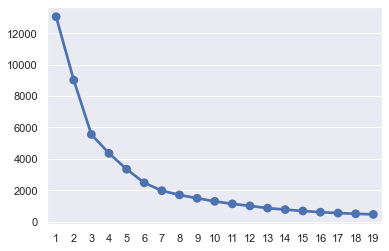

In [288]:
sns.pointplot(abc,wcss)

In [289]:
KM=KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=101)
y_kmeans=KM.fit_predict(scaler_data)
y_kmeans

array([3, 3, 3, ..., 3, 0, 3])

In [290]:
RFMScores1['Cluster']= KM.labels_
RFMScores1

,Recency,Frequency,Monetory,Cluster
0,4,182,553704.0,3
1,77,27,257404.0,3
2,20,72,176613.0,3
3,18,16,41976.0,3
4,9,84,151822.0,3
...,...,...,...,...
4344,17,10,20480.0,3
4345,181,7,10774.0,1
4346,12,13,24962.0,3
4347,4,754,280608.0,0


In [291]:
RFMScores1.to_csv('cluster_information.csv')

In [293]:
RFMScores.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Diamond
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,Platinum
4,6.0,9,84,151822.0,1,2,2,5,Diamond


In [296]:
my_analysis= RFMScores.groupby('Loyalty_Level')[['Recency','Frequency','Monetory','CustomerID']].agg({
    'Recency':'sum','Frequency':'sum','Monetory':'sum',
    'CustomerID':'nunique'
}).reset_index()

In [297]:
my_analysis= my_analysis.rename(columns={'CustomerID':'NumberBuyers'})
my_analysis

,Loyalty_Level,Recency,Frequency,Monetory,NumberBuyers
0,Diamond,13153,297058,764380322.0,1299
1,Gold,42005,75105,163028031.0,1290
2,Platinum,78894,23752,53132459.1,939
3,Silver,133173,8266,19459535.0,821


In [299]:
my_analysis['Percent']=round(my_analysis['NumberBuyers']/my_analysis['NumberBuyers'].sum()*100,2)
my_analysis

,Loyalty_Level,Recency,Frequency,Monetory,NumberBuyers,Percent
0,Diamond,13153,297058,764380322.0,1299,29.87
1,Gold,42005,75105,163028031.0,1290,29.66
2,Platinum,78894,23752,53132459.1,939,21.59
3,Silver,133173,8266,19459535.0,821,18.88


In [304]:
#plotly or squarify

!pip install squarify


In [305]:
import squarify

In [306]:
my_viz=my_analysis[['Loyalty_Level','NumberBuyers','Percent']]
my_viz

,Loyalty_Level,NumberBuyers,Percent
0,Diamond,1299,29.87
1,Gold,1290,29.66
2,Platinum,939,21.59
3,Silver,821,18.88


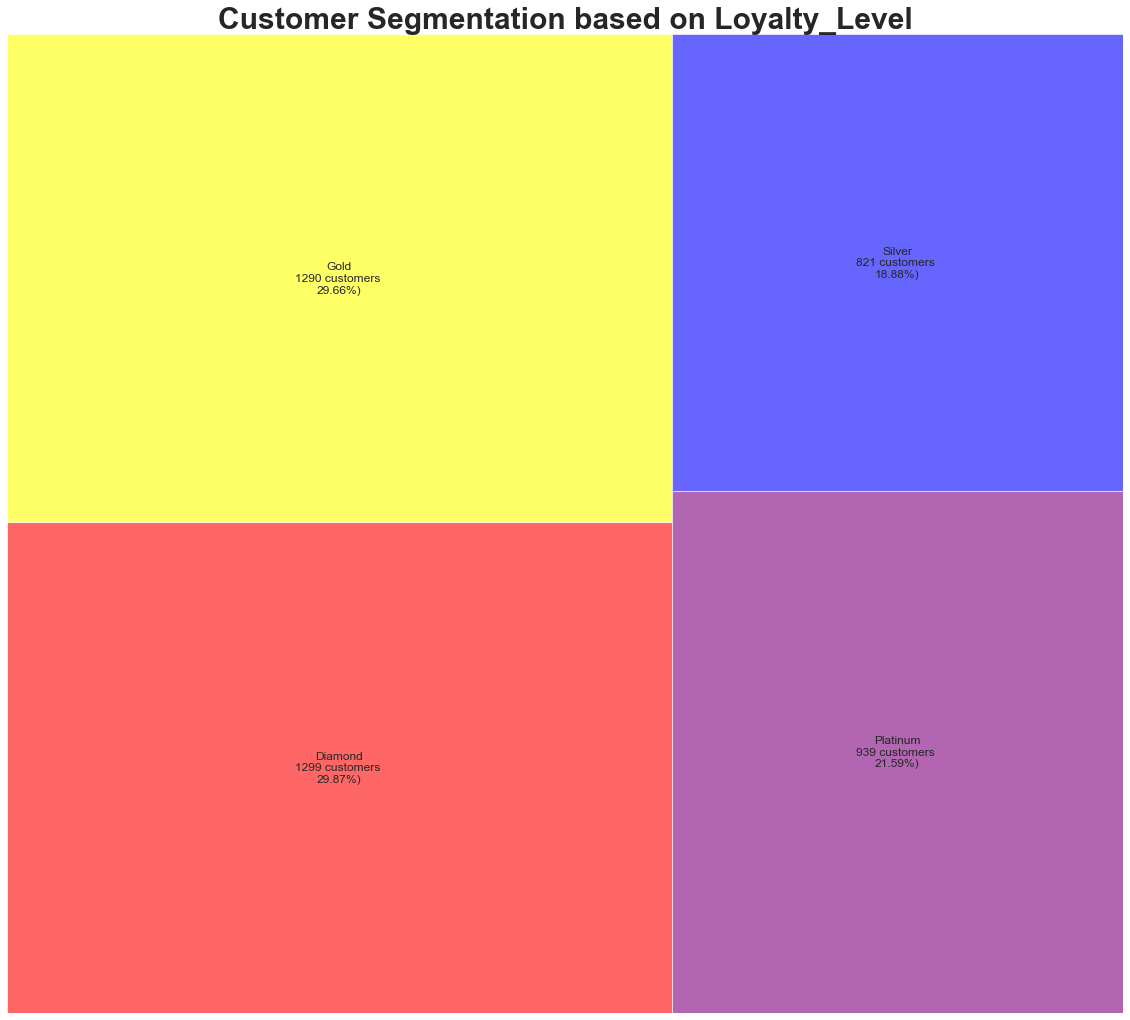

In [313]:
fig=plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(20,18)
colors_dics={'Diamond':'Red','Gold':'Yellow','Platinum':'Purple','Silver':'Blue' }
squarify.plot(sizes=my_viz['NumberBuyers'], color=colors_dics.values(),
              label=['{}\n{:.0f} customers \n{}%)'. format(*my_viz.iloc[i])
                     for i in range (0,len(my_viz))],alpha=0.6)
              
plt.title('Customer Segmentation based on Loyalty_Level', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()
